In [2]:
import json
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
import string

In [5]:
with open('my_df.json', encoding='utf-8') as f:
    my_json = json.load(f)

my_df = pd.DataFrame(my_json)
my_df.head()

,Place,Description,Tourism
0,SÜMELA MANASTIRI,Sümela Manastırı (Meryem Ana) Manastırı Nerede...,İnanç-Kültür Turizmi
1,IHLARA VADİSİ,Tarihi kaynaklardaki adı Peristremma olan Ihla...,Doğa-Kültür Turizmi
2,DARA ANTİK KENTİ,Dara Antik Kenti Mardin’in 30 kilometre güneyd...,Kültür Turizmi
3,KIZ KALESİ,"Deniz Kalesi olarak da bilinen Kız Kalesi, adı...",Kültür Turizmi
4,TİTUS TÜNELİ VE BEŞİKLİ MAĞARA,Hatay'ın Samandağ İlçesi Çevlik Örenyeri yakın...,Doğa Turizmi


In [3]:
np.unique(my_df['Tourism'])

array(['Deniz Turizmi', 'Doğa Turizmi', 'Doğa-Kültür Turizmi',
       'Kültür Turizmi', 'Kış Turizmi', 'Termal Turizmi', 'Yayla Turizmi',
       'İnanç Turizmi', 'İnanç-Kültür Turizmi'], dtype=object)

In [4]:
# birleştirilebilecek sınıfları bir label altında toplama

my_df.loc[my_df.Tourism == "Doğa-Kültür Turizmi", "Tourism"] = "Doğa"
my_df.loc[my_df.Tourism == "Doğa Turizmi", "Tourism"] = "Doğa"
my_df.loc[my_df.Tourism == "İnanç-Kültür Turizmi", "Tourism"] = "İnanç"
my_df.loc[my_df.Tourism == "İnanç Turizmi", "Tourism"] = "İnanç"

In [9]:
type(np.unique(my_df['Tourism']))

numpy.ndarray

In [5]:
labels = np.unique(my_df['Tourism'])
freq = [my_df['Tourism'].value_counts()[i] for i in labels]

for i in range(len(labels)):
    print(labels[i], ': ', freq[i])

Deniz Turizmi :  19
Doğa :  646
Kültür Turizmi :  1547
Kış Turizmi :  10
Termal Turizmi :  30
Yayla Turizmi :  93
İnanç :  926


In [6]:
# daha genl bir sınıfa dahil edilebilecek sınıfları o sınıfa dahil etme
# yeniden isimlendirme

my_df.loc[my_df.Tourism == "Deniz Turizmi", "Tourism"] = "Doğa"
my_df.loc[my_df.Tourism == "Yayla Turizmi", "Tourism"] = "Doğa"
my_df.loc[my_df.Tourism == "Kültür Turizmi", "Tourism"] = "Kültür"
my_df.loc[my_df.Tourism == "Kış Turizmi", "Tourism"] = "Kış"
my_df.loc[my_df.Tourism == "Termal Turizmi", "Tourism"] = "Termal"
np.unique(my_df['Tourism'])

array(['Doğa', 'Kültür', 'Kış', 'Termal', 'İnanç'], dtype=object)

In [7]:
labels = np.unique(my_df['Tourism'])
freq = [my_df['Tourism'].value_counts()[i] for i in labels]

In [8]:
freq_df = {'tourism': list(labels),
           'freq': freq}
freq_df = pd.DataFrame(freq_df)
freq_df

,tourism,freq
0,Doğa,758
1,Kültür,1547
2,Kış,10
3,Termal,30
4,İnanç,926


Text(0.5, 0, 'tourism')

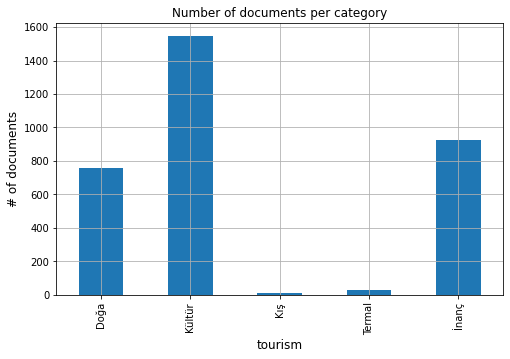

In [10]:
freq_df.plot(x='tourism', y='freq', kind='bar', legend=False, grid=True, figsize=(8, 5))
plt.title("Number of documents per category")
plt.ylabel('# of documents', fontsize=12)
plt.xlabel('tourism', fontsize=12)

In [11]:
# SOURCE: https://github.com/apdullahyayik/TrTokenizer

from trtokenizer.tr_tokenizer import SentenceTokenizer, WordTokenizer
word_tokenizer_object = WordTokenizer()

In [23]:
def clean_text(text):
    
    text = text.lower()   
    
    text = text.translate(str.maketrans('', '', string.punctuation)) # !"#$%&'()*+, -./:;<=>?@[\]^_`{|}~

    words = word_tokenizer_object.tokenize(text)

    stopWords = set(stopwords.words('turkish'))
    new_text = ' '.join(word for word in words if word not in stopWords)

    return new_text

In [24]:
t = my_df['Description'][0]
t = clean_text(t)
t

'sümela manastırı meryem ana manastırı nerededirtrabzon’un maçka i lçesinin altındere köyü sınırları içinde altındere vadisine hakim karadağ’ın eteklerinde sarp bir kayalık üzerine kurulmuş olan sümela manastırı halk arasında meryem ana adı anılır vadiden yaklaşık 300 metre yükseklikte bulunan yapı konumuyla manastırların şehir dışında ormanlarda mağara su kenarlarında kurulma geleneğini sürdürmüştür meryem ana adına kurulan manastırın sümela adını siyah anlamına gelen melas sözcüğünden aldığı söylenmektedir ismin manastırın kurulduğu koyu renkli karadağlar’ dan geldiği düşünülmekte sümela kelimesi buradaki meryem tasvirinin siyah rengine bağlanabilmektedirsümela manastırının tarihirivayete göre bizans i mparatoru itheodosius zamanında 375395 atina’dan gelen barnabas sophranios isimli iki rahip tarafından kurulmuş olan manastır 6ıncı yüzyılda i mparator justinianus’un manastırın onarılarak genişletilmesini istemesi üzerine generallerinden belisarios tarafından tamir edilmiştirsümela ma

In [26]:
# clean all texts

cleaned_texts = []

for text in my_df.Description:
    cleaned_texts.append(clean_text(text))

my_df.Description = cleaned_texts
my_df

,Place,Description,Tourism
0,SÜMELA MANASTIRI,sümela manastırı meryem ana manastırı nerededi...,İnanç
1,IHLARA VADİSİ,tarihi kaynaklardaki adı peristremma olan ihla...,Doğa
2,DARA ANTİK KENTİ,dara antik kenti mardin’in 30 kilometre güneyd...,Kültür
3,KIZ KALESİ,deniz kalesi olarak bilinen kız kalesi adını v...,Kültür
4,TİTUS TÜNELİ VE BEŞİKLİ MAĞARA,hatayın samandağ i lçesi çevlik örenyeri yakın...,Doğa
...,...,...,...
3266,YÜZBAŞISUYU ÇEŞMESİ,sel değirmeni mahallesi yüzbaşısuyu sokak’ta y...,Kültür
3267,YEDİKUYULAR KAYAK MERKEZİ,kahramanmaraş ili dulkadiroğlu ilçesi yedikuyu...,Kış
3268,SALDA GÖLÜ,salda gölü burdur’un yaklaşık 64 km batısında ...,Doğa
3269,ANKARA KALESİ,ankara’nın sembollerinden olan ankara kalesi’n...,Kültür


In [29]:
my_df.to_csv('preprocessed_df.csv', sep='\t')

In [3]:
my_df = pd.read_csv('preprocessed_df.csv', sep='\t')
my_df

,Unnamed: 0.1,Unnamed: 0,Place,Description,Tourism
0,0,0,SÜMELA MANASTIRI,sümela manastırı meryem ana manastırı nerededi...,İnanç
1,1,1,IHLARA VADİSİ,tarihi kaynaklardaki adı peristremma olan ihla...,Doğa
2,2,2,DARA ANTİK KENTİ,dara antik kenti mardin’in 30 kilometre güneyd...,Kültür
3,3,3,KIZ KALESİ,deniz kalesi olarak bilinen kız kalesi adını v...,Kültür
4,4,4,TİTUS TÜNELİ VE BEŞİKLİ MAĞARA,hatayın samandağ i lçesi çevlik örenyeri yakın...,Doğa
...,...,...,...,...,...
3266,3266,3266,YÜZBAŞISUYU ÇEŞMESİ,sel değirmeni mahallesi yüzbaşısuyu sokak’ta y...,Kültür
3267,3267,3267,YEDİKUYULAR KAYAK MERKEZİ,kahramanmaraş ili dulkadiroğlu ilçesi yedikuyu...,Kış
3268,3268,3268,SALDA GÖLÜ,salda gölü burdur’un yaklaşık 64 km batısında ...,Doğa
3269,3269,3269,ANKARA KALESİ,ankara’nın sembollerinden olan ankara kalesi’n...,Kültür


In [4]:
my_df['Description'][3]

'deniz kalesi olarak bilinen kız kalesi adını verdiği mahalle sahilindeki küçük bir adacığın üzerinde kurulmuştur kıyıya uzaklığı yaklaşık 600 metredir burada bulunan bir yazıttan 1199 yılında i leon tarafından yaptırılmış olduğu öğrenilmiştir1361’de kıbrıs krallığı tarafından zapt edilmiştir strabon roma dönemi’nde korsanların kaleyi barınak olarak kullandıklarından bahsetmektedir kale bizans ermeniler tarafından karadaki kale kadar önemsenmiştir kalenin girişi kuzeydedirburada devşirme malzeme kullanılmıştır yine zaman zaman moloz taşların kullanıldığı yerler büyük bir olasılıkla lusignanlar dönemine ait olmalıdır 192 metre uzunluğundaki mazgal delikleri açılmış kale suru üzerine üçgen dörtgen yuvarlak biçiminde 8 burç oturtulmuştur batıdaki sur boyunca uzanan iyi korunmuş bir galeri buradan denize açılan bir kapı bulunmaktadırmersin arkeoloji müzesi tarafından yapılan temizlik kazısı sırasında kalenin orta alanında bir yapı kompleksi ortaya çıkarılmıştır yapı kompleksi içerisinde bi